### 导包

In [2]:
import numpy as np

import pandas as pd

from pandas import Series,DataFrame

# 画图
import matplotlib.pyplot as plt
%matplotlib inline

### 导入数据

In [3]:
# 读取user用户
# UserID::Gender::Age::Occupation::Zip-code
labels = ['UserId','Gender','Age','Occupation','zip-code']

users = pd.read_csv('../data/users.dat',sep = '::',header = None,names = labels)
users.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


(6040, 5)

In [4]:
users.head()

,UserId,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# movie
# MovieID::Title::Genres
labels = ['MovieId','Title','Genres']

movie = pd.read_csv('../data/movies.dat',sep = '::',header = None,names = labels)

display(movie.head(),movie.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


(3883, 3)

In [6]:
# 评分
# UserID::MovieID::Rating::Timestamp
labels = ['UserId','MovieId','Rating','Time']

ratings = pd.read_csv('../data/ratings.dat',sep = '::',header = None,names = labels )
display(ratings.head(),ratings.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,UserId,MovieId,Rating,Time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


(1000209, 4)

### 数据合并

In [7]:
# 三个表，
display(users.head(),movie.head(),ratings.head())

,UserId,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


,UserId,MovieId,Rating,Time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
df1 = pd.merge(left = movie,right=ratings)
df1.head()

,MovieId,Title,Genres,UserId,Rating,Time
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
movie_data = pd.merge(df1,users)

In [10]:
movie_data.shape

(1000209, 10)

In [11]:
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
movie_data['Age'].unique()

array([ 1, 50, 25, 35, 18, 45, 56], dtype=int64)

### 查看数据

In [13]:
movie_data.shape

(1000209, 10)

In [14]:
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
movie_data['Title'].unique().size   # 查看有多少部电影

3706

### 平均分较高的电影

In [16]:
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [17]:
#以title 作为index 对数据进行划分
movie_rate_pingjun = pd.pivot_table(movie_data,values=['Rating'],index = ['Title'],aggfunc='mean')
movie_rate_pingjun.shape

(3706, 1)

In [18]:
movie_rate_pingjun.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [19]:
movie_rate_pingjun.sort_values(by = 'Rating',ascending=False,inplace=False)

,Rating
Title,
Ulysses (Ulisse) (1954),5.0
Lured (1947),5.0
Follow the Bitch (1998),5.0
Bittersweet Motel (2000),5.0
Song of Freedom (1936),5.0
...,...
"Fantastic Night, The (La Nuit Fantastique) (1949)",1.0
Cheetah (1989),1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973),1.0


In [20]:
movie_rate_pingjun[:20]

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
1-900 (1994),2.500000
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703


In [21]:
movie_rate_pingjun[-20:]

,Rating
Title,
Year of the Horse (1997),3.250000
Yellow Submarine (1968),3.696742
Yojimbo (1961),4.404651
You Can't Take It With You (1938),4.012987
You So Crazy (1994),2.615385
You've Got Mail (1998),3.380668
Young Doctors in Love (1982),2.607595
Young Frankenstein (1974),4.250629
Young Guns (1988),3.418149


### 不同性别对电影的平均评分

In [22]:
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [23]:
# 透视表，透视数据结构 ,两个index 
movie_gender_rating_pingjun = pd.pivot_table(movie_data,values=['Rating'],index=['Title','Gender'],aggfunc='mean')
movie_rate_pingjun.shape

(3706, 1)

In [24]:
movie_gender_rating_pingjun.head()  # dataframe

Rating
Title                     Gender          
$1,000,000 Duck (1971)    F       3.375000
                          M       2.761905
'Night Mother (1986)      F       3.388889
                          M       3.352941
'Til There Was You (1997) F       2.675676

In [25]:
#去掉中括号 ，
movie_gender_rating_pingjun0 = pd.pivot_table(movie_data,values=['Rating'],index=['Title'],columns=['Gender'],aggfunc='mean')
print(movie_gender_rating_pingjun0.head())
movie_gender_rating_pingjun = pd.pivot_table(movie_data,values='Rating',index=['Title'],columns=['Gender'],aggfunc='mean')
movie_gender_rating_pingjun.shape
movie_gender_rating_pingjun.head()

                                 Rating          
Gender                                F         M
Title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024


Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [26]:
movie_gender_rating_pingjun.head()

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


### 不同性别区别最大电影的排序

In [27]:
movie_gender_rating_pingjun.columns

Index(['F', 'M'], dtype='object', name='Gender')

In [28]:
# 女性用户和男性用户对定影评分差异 ，给数据集增加一列
movie_gender_rating_pingjun['diff'] = movie_gender_rating_pingjun.F - movie_gender_rating_pingjun.M

In [29]:
movie_gender_rating_pingjun.head()

Gender,F,M,diff
Title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,0.613095
'Night Mother (1986),3.388889,3.352941,0.035948
'Til There Was You (1997),2.675676,2.733333,-0.057658
"'burbs, The (1989)",2.793478,2.962085,-0.168607
...And Justice for All (1979),3.828571,3.689024,0.139547


In [30]:
# 排序,sort_values 是pandans常用的方法
movie_gender_rating_pingjun.sort_values(by = 'diff',ascending=False,inplace=True)
movie_gender_rating_pingjun.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [31]:
# 女性用户和男性用户差异最大，女性用最喜欢 ,头10名
female = movie_gender_rating_pingjun[:10]
female

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
Cobra (1925),4.000000,1.500000,2.500000
"Other Side of Sunday, The (S鴑dagsengler) (1996)",5.000000,2.928571,2.071429
Theodore Rex (1995),3.000000,1.000000,2.000000
For the Moment (1994),5.000000,3.000000,2.000000


In [32]:
#男性用户最喜欢的 ，去除女性用户评分空数据
print(movie_gender_rating_pingjun[-10:])  #有空值
male = movie_gender_rating_pingjun.dropna()[-10:]
male

Gender                                     F         M  diff
Title                                                       
White Boys (1999)                        NaN  1.000000   NaN
Wild Bill (1995)                         NaN  3.146341   NaN
Windows (1980)                           NaN  1.000000   NaN
Wings of Courage (1995)                  NaN  3.000000   NaN
With Byrd at the South Pole (1930)       NaN  2.000000   NaN
With Friends Like These... (1998)        NaN  4.000000   NaN
Wooden Man's Bride, The (Wu Kui) (1994)  NaN  3.000000   NaN
Year of the Horse (1997)                 NaN  3.250000   NaN
Zachariah (1971)                         NaN  3.500000   NaN
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995) NaN  3.500000   NaN


Gender,F,M,diff
Title,,,
Jamaica Inn (1939),1.0,3.142857,-2.142857
"Flying Saucer, The (1950)",1.0,3.300000,-2.300000
Rosie (1998),1.0,3.333333,-2.333333
In God's Hands (1998),1.0,3.333333,-2.333333
Dangerous Ground (1997),1.0,3.333333,-2.333333
Killer: A Journal of Murder (1995),1.0,3.428571,-2.428571
Stalingrad (1993),1.0,3.593750,-2.593750
"Enfer, L' (1994)",1.0,3.750000,-2.750000
"Neon Bible, The (1995)",1.0,4.000000,-3.000000


In [33]:
diff = pd.concat([female,male])
diff

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429
Cobra (1925),4.000000,1.500000,2.500000
"Other Side of Sunday, The (S鴑dagsengler) (1996)",5.000000,2.928571,2.071429
Theodore Rex (1995),3.000000,1.000000,2.000000
For the Moment (1994),5.000000,3.000000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40209 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40209 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38300 missing from current font.
  font.set_text(s, 0, flags=flags)


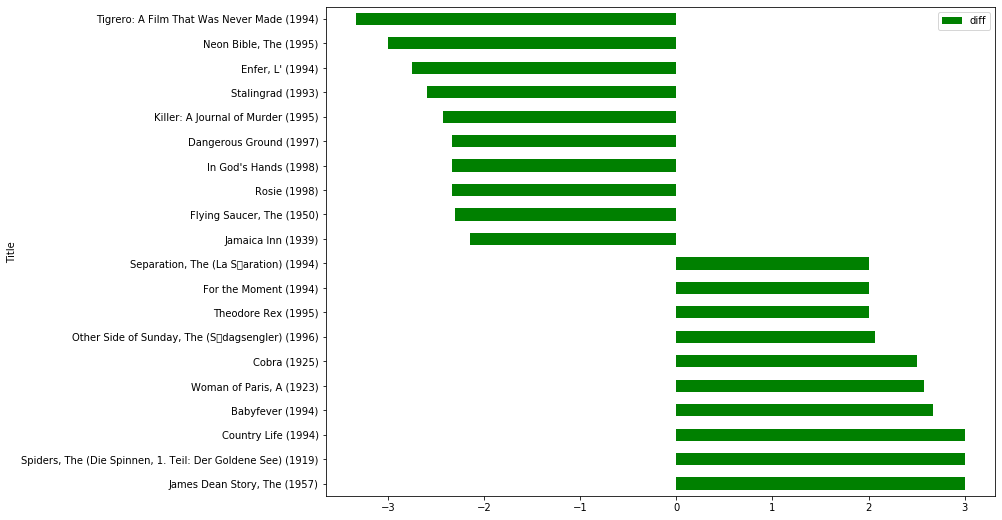

In [34]:
# 分析结果
# 数据可视化
# barh水平的柱状图  x 横坐标，标题， y 纵坐标 
diff.plot(y = 'diff' ,kind = 'barh',figsize=(12,9),color= 'green' )

### 评分次数最多热门的电影

In [35]:
# pandas分组运算
movie_data.shape

(1000209, 10)

In [36]:
rating_count = movie_data.groupby(['Title']).size()

In [37]:
rating_count.sort_values(ascending=False)[:50]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

### 查看不同年龄段差别最大的电影：

#### 查看用户的年龄分布：

In [38]:
movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


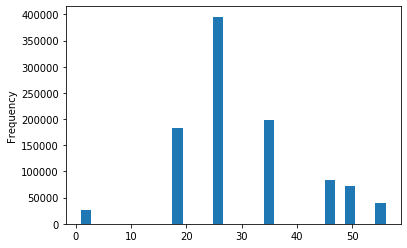

In [39]:
movie_data['Age'].plot(kind = 'hist',bins = 30) #横坐标年龄段 

In [40]:
movie_data.Age.max()  # 最大年龄的

56

#### 用pandas.cut函数将用户年龄分组

In [41]:
range(0,60,10)

range(0, 60, 10)

In [42]:
labels = ['0-9','10-19','20-29','30-39','40-49','50-59']

movie_data['Age_range'] = pd.cut(movie_data.Age,bins = range(0,61,10),labels=labels)

movie_data.head()

,MovieId,Title,Genres,UserId,Rating,Time,Gender,Age,Occupation,zip-code,Age_range
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0-9
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0-9
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0-9
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,0-9
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,0-9


#### 每个年龄段用户评分人数和打分偏好

In [43]:
movie_data.groupby('Age_range').mean()

,MovieId,UserId,Rating,Time,Age,Occupation
Age_range,,,,,,
0-9,1869.380875,2717.664437,3.549520,9.759793e+08,1.000000,8.765977
10-19,1815.417967,2789.483818,3.507573,9.736918e+08,18.000000,6.725596
20-29,1849.590119,3121.309319,3.545235,9.720568e+08,25.000000,7.887353
30-39,1895.714251,3040.853475,3.618162,9.715593e+08,35.000000,8.816138
40-49,1910.396975,3103.339425,3.673559,9.714742e+08,47.321567,8.451356
50-59,1927.316194,2963.619082,3.766632,9.712856e+08,56.000000,9.569856


In [44]:
movie_data.groupby('Age_range').agg({'Rating':[np.size,np.mean]})

Rating          
             size      mean
Age_range                  
0-9         27211  3.549520
10-19      183536  3.507573
20-29      395556  3.545235
30-39      199003  3.618162
40-49      156123  3.673559
50-59       38780  3.766632

In [45]:
#group 例子

In [46]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df


,A,B,C,D
0,foo,one,-0.637894,-1.135188
1,bar,one,-0.294759,0.241919
2,foo,two,-0.200366,0.086841
3,bar,three,-1.022390,1.583450
4,foo,two,1.371571,0.961330
5,bar,two,-1.031219,-0.467563
6,foo,one,-0.152224,-0.581771
7,foo,three,0.014298,-1.379359


分组迭代Iterating through groups

In [47]:
grouped = df.groupby('A')
for name, group in grouped:
      print(name)
      print(group)

bar
     A      B         C         D
1  bar    one -0.294759  0.241919
3  bar  three -1.022390  1.583450
5  bar    two -1.031219 -0.467563
foo
     A      B         C         D
0  foo    one -0.637894 -1.135188
2  foo    two -0.200366  0.086841
4  foo    two  1.371571  0.961330
6  foo    one -0.152224 -0.581771
7  foo  three  0.014298 -1.379359


In [48]:
#获得一个分组get_group
grouped.get_group('bar')

,A,B,C,D
1,bar,one,-0.294759,0.241919
3,bar,three,-1.022390,1.583450
5,bar,two,-1.031219,-0.467563


使用多种函数agg()

In [49]:
grouped = df.groupby('A')
grouped['C'].agg([np.sum, np.mean, np.std])

,sum,mean,std
A,,,
bar,-2.348367,-0.782789,0.422670
foo,0.395385,0.079077,0.761639


#聚合size方法

In [50]:
df = pd.DataFrame({'Year' : ['2001', '2002', '2001', '2002',
                          '2001', '2002', '2001', '2002'],
                   'score' : ['primary', 'second', 'third', 'fourth',
                          'primary', 'second', 'fourth', 'third'],
                   'C' : [1,2,1,2,1,2,1,2],
                   'D' : np.random.randn(8)})

grouped = df.groupby('Year')
print (grouped['C'].agg(np.size))

Year
2001    4
2002    4
Name: C, dtype: int64


聚合多种方法

In [51]:
grouped = df.groupby('Year')
print (grouped['C'].agg([np.size,np.sum,np.mean]))

      size  sum  mean
Year                 
2001     4    4     1
2002     4    8     2


In [ ]:
df = pd.DataFrame({'Year' : ['2001', '2002', '2001', '2002',
                          '2001', '2002', '2001', '2002'],
                   'score' : ['primary', 'second', 'third', 'fourth',
                          'primary', 'second', 'fourth', 'third'],
                   'C' :[1,2,1,2,1,2,1,2],
                   'D' : np.random.randn(8)})
grouped = df.groupby('Year')
score = lambda x: (x - x.mean())
print(df)
print('----------')
print(grouped['C'].agg(np.mean))
print('----------')
print (grouped['C'].transform(score))
df

### 问题出现在哪里？？？？

#### 这个问题在上面第五项分析中最为明显：为什么那些平均分高的电影，我从来没看过？甚至有些听都没听过呢？这个问题
#### 是不符合常理的，毕竟国内外好电影大家按说都应该耳熟能详的，所以这其中一定存在错误。

In [52]:
#看平均分的前10个数据，发现很大都不知道的电影。
movie_rate_pingjun[:10]

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
1-900 (1994),2.500000
10 Things I Hate About You (1999),3.422857
101 Dalmatians (1961),3.596460
101 Dalmatians (1996),3.046703


### 加入评分次数限制的分析不同性别对电影的平均评分：

In [53]:

movie_gender_rating_pingjun.index

Index(['James Dean Story, The (1957)',
       'Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)',
       'Country Life (1994)', 'Babyfever (1994)', 'Woman of Paris, A (1923)',
       'Cobra (1925)', 'Other Side of Sunday, The (S鴑dagsengler) (1996)',
       'Theodore Rex (1995)', 'For the Moment (1994)',
       'Separation, The (La S閜aration) (1994)',
       ...
       'White Boys (1999)', 'Wild Bill (1995)', 'Windows (1980)',
       'Wings of Courage (1995)', 'With Byrd at the South Pole (1930)',
       'With Friends Like These... (1998)',
       'Wooden Man's Bride, The (Wu Kui) (1994)', 'Year of the Horse (1997)',
       'Zachariah (1971)', 'Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995)'],
      dtype='object', name='Title', length=3706)

In [54]:
movie_gender_rating_pingjun.head()

Gender,F,M,diff
Title,,,
"James Dean Story, The (1957)",4.000000,1.000000,3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,3.000000
Country Life (1994),5.000000,2.000000,3.000000
Babyfever (1994),3.666667,1.000000,2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,2.571429


In [55]:
 movie_data.groupby('Title').size().sort_values()[::-1][:50]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [56]:
#对观影次数做个排序
top_movie_title = movie_data.groupby('Title').size().sort_values()[::-1][:50].index
top_movie_title

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       'Men in Black (1997)', 'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       'Sixth Sense, The (1999)', 'Braveheart (1995)',
       'Shakespeare in Love (1998)', 'Princess Bride, The (1987)',
       'Schindler's List (1993)', 'L.A. Confidential (1997)',
       'Groundhog Day (1993)', 'E.T. the Extra-Terrestrial (1982)',
       'Star Wars: Episode I - The Phantom Menace (1999)',
       'Being John Malkovich (1999)', 'Shawshank Redemption, The (1994)',
       'Godfather, The (1972)', 'Forrest Gump (1994)', 'Ghostbusters (1984)',
       'Pulp Fiction (1994)', 'Terminator, The (1984)', 

In [57]:
flag = movie_gender_rating_pingjun.index.isin(top_movie_title)
flag

array([False, False, False, ..., False, False, False])

In [58]:
df1 = movie_gender_rating_pingjun[flag].sort_values(by = 'diff') # 比较好的电影男女都喜欢
df1

Gender,F,M,diff
Title,,,
Airplane! (1980),3.656566,4.064419,-0.407854
"Godfather: Part II, The (1974)",4.040936,4.437778,-0.396842
Aliens (1986),3.802083,4.186684,-0.384601
Terminator 2: Judgment Day (1991),3.785088,4.115367,-0.330279
Alien (1979),3.888252,4.216119,-0.327867
"Terminator, The (1984)",3.899729,4.205899,-0.306170
Groundhog Day (1993),3.735562,4.041358,-0.305796
2001: A Space Odyssey (1968),3.825581,4.129738,-0.304156
Saving Private Ryan (1998),4.114783,4.398941,-0.284159


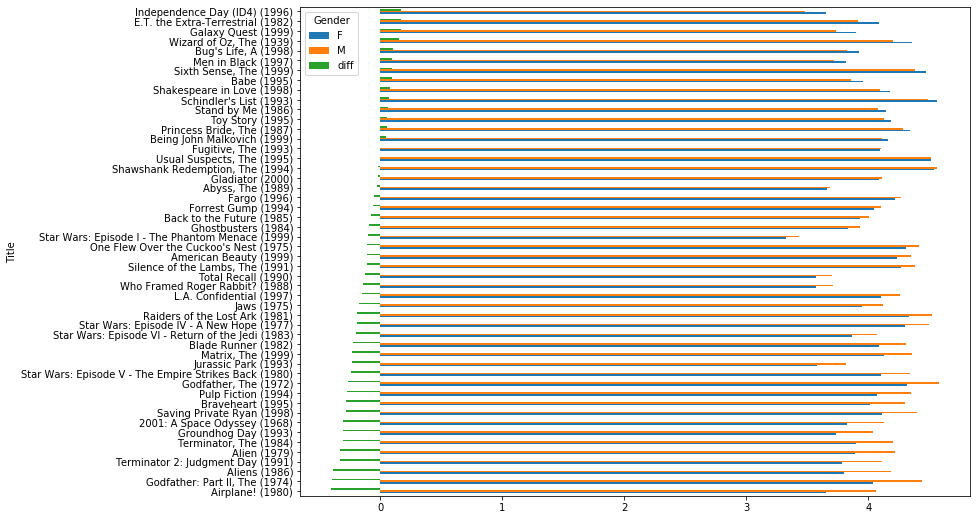

In [59]:
df1.plot(kind = 'barh',figsize=(12,9))

### 加入评分次数限制的分析平均分高的电影

In [60]:
movie_rating_mean = pd.pivot_table(movie_data,values='Rating',index=['Title'])
movie_rating_mean 

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kj鎟lighetens kj鴗ere) (1995),3.500000


In [61]:


#数据倒置,取50 ，评估次数最多的电影的index 
movie_data.groupby('Title').size().sort_values()[::-1][:50]  

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [62]:

#::-1 对数据做切片，倒序  最受欢迎的电影 获取index
top_movie_title2 = movie_data.groupby('Title').size().sort_values()[::-1][:50].index
top_movie_title2

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)', 'Saving Private Ryan (1998)',
       'Terminator 2: Judgment Day (1991)', 'Matrix, The (1999)',
       'Back to the Future (1985)', 'Silence of the Lambs, The (1991)',
       'Men in Black (1997)', 'Raiders of the Lost Ark (1981)', 'Fargo (1996)',
       'Sixth Sense, The (1999)', 'Braveheart (1995)',
       'Shakespeare in Love (1998)', 'Princess Bride, The (1987)',
       'Schindler's List (1993)', 'L.A. Confidential (1997)',
       'Groundhog Day (1993)', 'E.T. the Extra-Terrestrial (1982)',
       'Star Wars: Episode I - The Phantom Menace (1999)',
       'Being John Malkovich (1999)', 'Shawshank Redemption, The (1994)',
       'Godfather, The (1972)', 'Forrest Gump (1994)', 'Ghostbusters (1984)',
       'Pulp Fiction (1994)', 'Terminator, The (1984)', 

In [63]:
#平均分的数据 看头50个评分的数据是否在里面
print(movie_rating_mean.index.isin(top_movie_title2).sum())
flag = movie_rating_mean.index.isin(top_movie_title2)
print(flag.shape)
print(flag)
# 热门电影平均分
movie_rating_top_mean = movie_rating_mean[flag]
movie_rating_top_mean

50
(3706,)
[False False False ... False False False]


,Rating
Title,
2001: A Space Odyssey (1968),4.068765
"Abyss, The (1989)",3.683965
Airplane! (1980),3.971115
Alien (1979),4.159585
Aliens (1986),4.125824
American Beauty (1999),4.317386
Babe (1995),3.891491
Back to the Future (1985),3.990321
Being John Malkovich (1999),4.125390


In [64]:
movie_rating_top_mean.sort_values(by = 'Rating',ascending=False)

,Rating
Title,
"Shawshank Redemption, The (1994)",4.554558
"Godfather, The (1972)",4.524966
"Usual Suspects, The (1995)",4.517106
Schindler's List (1993),4.510417
Raiders of the Lost Ark (1981),4.477725
Star Wars: Episode IV - A New Hope (1977),4.453694
"Sixth Sense, The (1999)",4.406263
One Flew Over the Cuckoo's Nest (1975),4.390725
"Godfather: Part II, The (1974)",4.357565


### 在数据处理过程中，合并、透视、分组、排序这四大类操作是最经常用的，所以希望大家能够熟练掌握这四种方法的用法。